In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 10, 10

In [2]:
full_data = pd.read_csv('cc_ohlcv_by_exchange_landing_202109130813.csv')
full_data['date'] = pd.to_datetime(full_data['date'])
clean_data = full_data.dropna()
#clean_data.info()
print("Dataset contains information from", clean_data['date'].min(), "till", clean_data['date'].max())
print("Length of the time series is", clean_data['date'].max()-clean_data['date'].min())

Dataset contains information from 2018-12-10 00:00:00 till 2021-09-12 00:00:00
Length of the time series is 1007 days 00:00:00


In [3]:
exchanges = clean_data['exchange'].unique()
number_of_exchanges = clean_data['exchange'].nunique()
symbols = clean_data['symbol'].unique()
number_of_symbols = clean_data['symbol'].nunique()

print('The dataset contains information from', number_of_exchanges,'exchanges')
print('Total number of cryptocurrencies', number_of_symbols)


The dataset contains information from 15 exchanges
Total number of cryptocurrencies 202


Index(['id', 'created_at', 'open', 'high', 'low', 'price', 'volume', 'amount',
       'symbol', 'exchange', 'timestamp', 'date'],
      dtype='object')

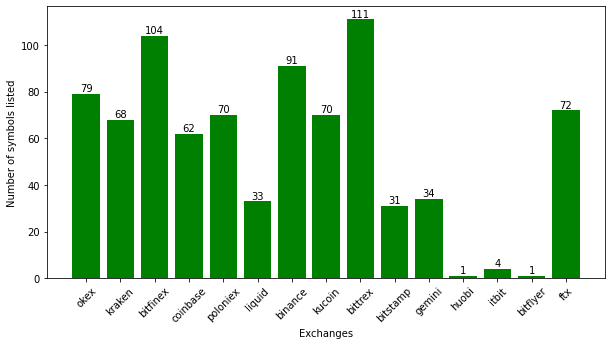

In [4]:
# Number of cryptocurrencies listed in each exchanges
exchanges_symbols = np.empty(number_of_exchanges)

for i, exchange in enumerate(exchanges):
    n = clean_data[clean_data['exchange']==exchange]['symbol'].nunique()
    exchanges_symbols[i] = n
plt.figure(figsize=(10,5))
plt.bar(exchanges, exchanges_symbols, color = 'green') 
plt.xticks(rotation = 45)
plt.xlabel('Exchanges'
          )
plt.ylabel('Number of symbols listed')
for exchange, n in zip(exchanges, exchanges_symbols):
    plt.text(exchange, n+1, str(int(n)), ha = 'center')
    
clean_data.keys()

In [5]:
volume_traded_each_day = clean_data.groupby(['date', 'exchange'])["volume"].mean()
volume_traded_each_day = volume_traded_each_day.reset_index()
print(volume_traded_each_day)
print(volume_traded_each_day['volume'].min())
print(volume_traded_each_day['volume'].max())

            date  exchange        volume
0     2018-12-10   binance  1.341603e+07
1     2018-12-10  bitfinex  6.758981e+06
2     2018-12-10  bitflyer  1.614999e+05
3     2018-12-10  bitstamp  9.782574e+06
4     2018-12-10   bittrex  3.183409e+05
...          ...       ...           ...
14581 2021-09-12    kraken  1.142161e+06
14582 2021-09-12    kucoin  6.065720e+05
14583 2021-09-12    liquid  3.327992e+04
14584 2021-09-12      okex  2.074543e+07
14585 2021-09-12  poloniex  2.106026e+05

[14586 rows x 3 columns]
0.0
835403999.1365116


In [6]:
x = clean_data.loc[clean_data['exchange'] == 'binance']
y = x.loc[x['date'] == '2018-12-10']
y['volume'].mean()

13416029.502105264

/home/sowmiya/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


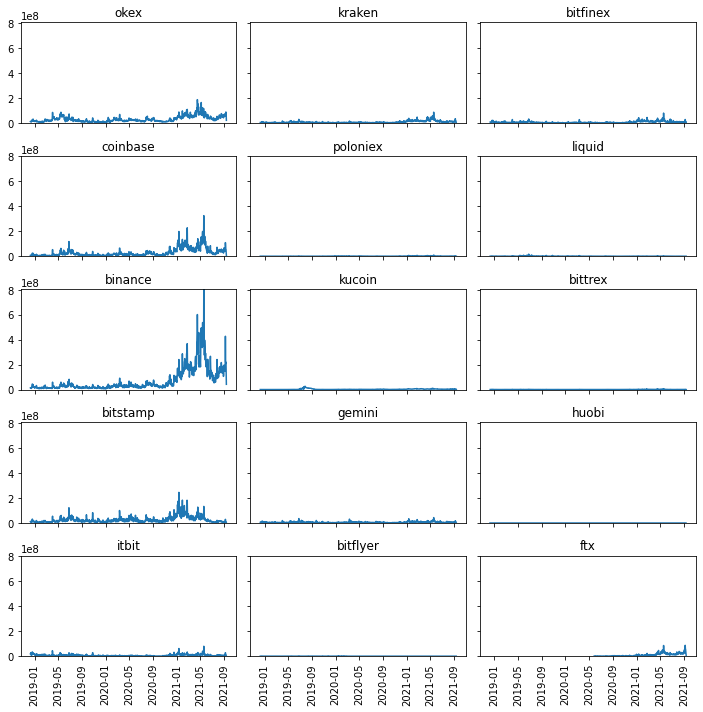

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=3, sharex='col', sharey='row')
for ax, exchange in zip(axes.flatten(), exchanges):
  subt = volume_traded_each_day[volume_traded_each_day['exchange'] == exchange]  
  ax.plot(subt['date'],subt['volume'], label = exchange)
  ax.tick_params(axis = 'x', labelrotation = 90)
  ax.set_ylim(0, 805405999.1365116)
  ax.set_title(exchange)

plt.tight_layout()

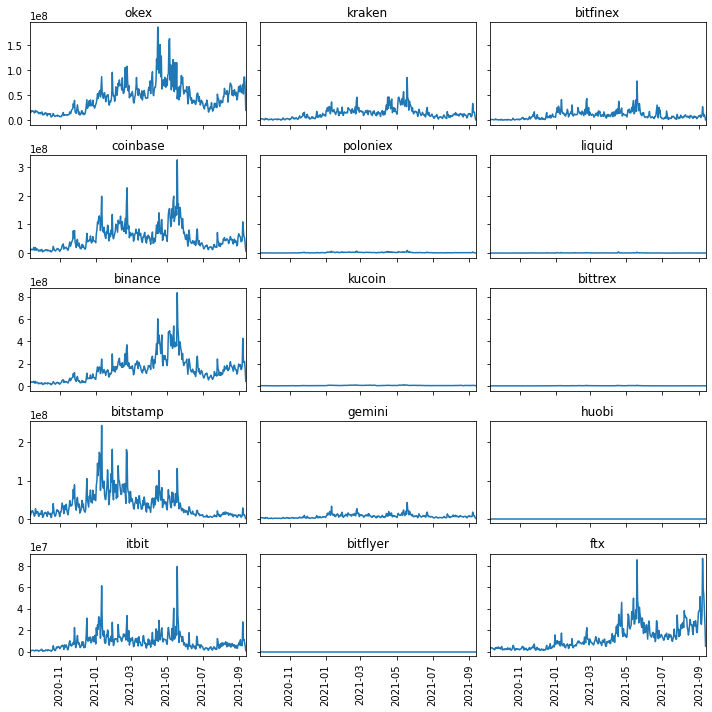

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=3, sharex='col', sharey='row')
for ax, exchange in zip(axes.flatten(), exchanges):
  subt = volume_traded_each_day[volume_traded_each_day['exchange'] == exchange]  
  ax.plot(subt['date'],subt['volume'], label = exchange)
  ax.tick_params(axis = 'x', labelrotation = 90)
  #ax.set_ylim(0, 805405999.1365116)
  ax.set_xlim('2020-09-12','2021-09-12')  
  ax.set_title(exchange)

plt.tight_layout()

In [9]:
volume_total = clean_data.groupby(['date'])["volume"].sum()
volume_total = volume_total.reset_index()
volume_by_market = clean_data.groupby(['date', 'exchange'])["volume"].sum()
volume_by_market = volume_by_market.reset_index()
volume_by_market['volume_in_percentage'] = np.empty(volume_by_market['volume'].shape)

for index, row in volume_by_market.iterrows():
    tv = volume_total[volume_total['date'] == row['date']]['volume']
    volume_by_market.at[index,'volume_in_percentage'] = (row['volume']/tv)*100


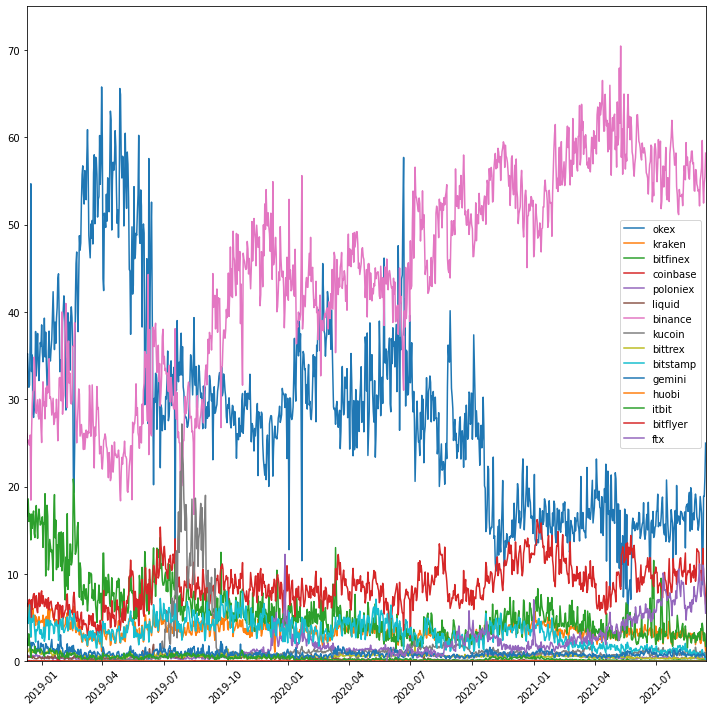

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex='col', sharey='row')
for exchange in exchanges:
  subt = volume_by_market[volume_by_market['exchange'] == exchange]  
  ax.plot(subt['date'],subt['volume_in_percentage'], label = exchange)
  ax.tick_params(axis = 'x', labelrotation = 45)


plt.xlim(clean_data['date'].min(), clean_data['date'].max())
plt.ylim(0, 75)
plt.legend()
plt.tight_layout()

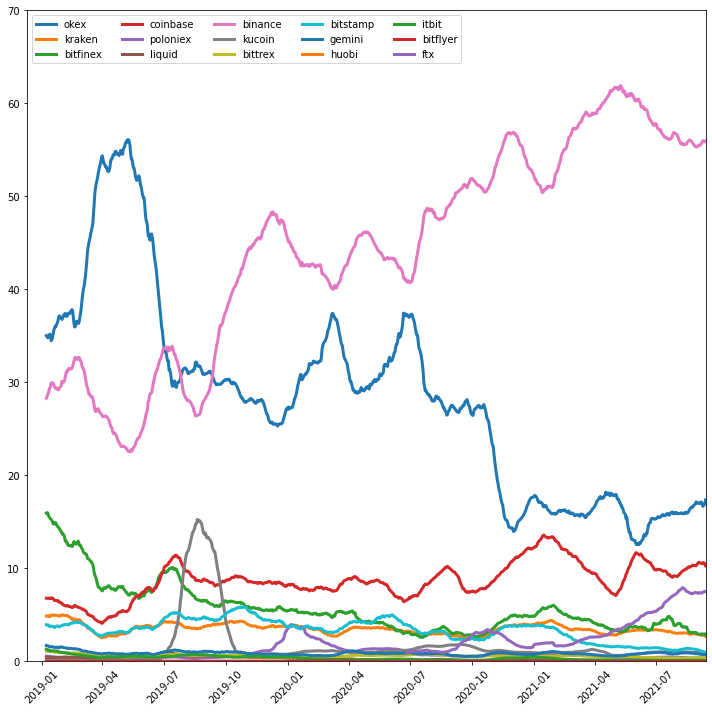

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex='col', sharey='row')

for exchange in exchanges:
  subt = volume_by_market[volume_by_market['exchange'] == exchange]  
  subt = subt.set_index(['date'])
  rolmean = subt['volume_in_percentage'].rolling(window=30).mean()
  ax.plot(rolmean, label=exchange, lw = 3)

ax.tick_params(axis = 'x', labelrotation = 45)
plt.xlim(clean_data['date'].min(), clean_data['date'].max())
plt.ylim(0, 70)
plt.legend(loc = 2, ncol = 5)
plt.tight_layout()